# Project:
### You work for a investiment company and everyday you need to send an email with some share's price.  
### The email needs the information from the past 6 months:
- Minimum share price
- Maximum share price
- Today's share price

In [9]:
# Step 1 - Install the needed libraries
## !pip install yfinance
## !pip install pyautogui
import yfinance as yf
import pyautogui
import pyperclip # Library that can copy texts, I could also use pyautogui.write

In [10]:
# Step 2 - Search for a price of a specific share
code = input('Enter the stock exchange share code: ')
data = yf.Ticker(code)
data_history = data.history("6mo") # data.history("d - for days, mo - for months, y - for years")
print(data_history) # Shows the history of the share price


                           Open  High   Low  Close     Volume  Dividends  \
Date                                                                       
2023-07-24 00:00:00-03:00  3.03  3.05  2.96   3.01   78400000        0.0   
2023-07-25 00:00:00-03:00  3.12  3.22  3.06   3.07  117608500        0.0   
2023-07-26 00:00:00-03:00  3.07  3.13  3.03   3.09   78128400        0.0   
2023-07-27 00:00:00-03:00  3.11  3.21  3.09   3.17  122566000        0.0   
2023-07-28 00:00:00-03:00  3.20  3.23  3.11   3.17   89386700        0.0   
...                         ...   ...   ...    ...        ...        ...   
2024-01-18 00:00:00-03:00  2.18  2.21  1.99   2.00  245451500        0.0   
2024-01-19 00:00:00-03:00  2.02  2.06  1.94   2.03  186982200        0.0   
2024-01-22 00:00:00-03:00  2.05  2.06  1.93   1.95  144213800        0.0   
2024-01-23 00:00:00-03:00  1.97  2.01  1.93   1.94  112312300        0.0   
2024-01-24 00:00:00-03:00  1.98  2.02  1.95   1.96   83172800        0.0   

           

In [11]:
# Step 3 - Aranging the data 
close = data_history.Close # Creating a variable that contains only the information that I need
display(close)

Date
2023-07-24 00:00:00-03:00    3.01
2023-07-25 00:00:00-03:00    3.07
2023-07-26 00:00:00-03:00    3.09
2023-07-27 00:00:00-03:00    3.17
2023-07-28 00:00:00-03:00    3.17
                             ... 
2024-01-18 00:00:00-03:00    2.00
2024-01-19 00:00:00-03:00    2.03
2024-01-22 00:00:00-03:00    1.95
2024-01-23 00:00:00-03:00    1.94
2024-01-24 00:00:00-03:00    1.96
Name: Close, Length: 126, dtype: float64

<Axes: xlabel='Date'>

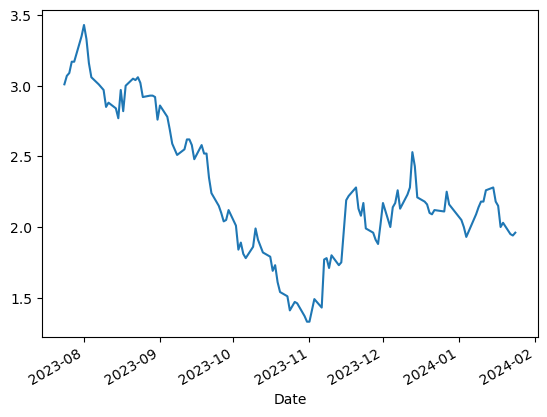

In [12]:
# Extra - Creating a sheet from the data 
close.plot() 

In [13]:
# Step 4 - Getting the asked data
# Minimum share price
min = close.min()
# Maximum share price
max = close.max()
# Today's share price 
# Example: In a sheet with 5 rows I can acess the last row using either: 5 or -1, the first row: 0 or -4
today = close[-1] # -1 means the information from the last rows()
print(min)
print(max)
print(today)


1.3300000429153442
3.430000066757202
1.9600000381469727


In [14]:
# Step 5 - Sending the email 
## 0 - Create the email's body template
## 1 - Open a new tab
## 2 - Type the email website
## 3 - Pres Enter
## 4 - Click on Compose Message button
## 5 - Write the receiver's email 
## 6 - Click Tab 
## 7 - Write the subject of the email 
## 8 - Write the email's body
## 9 - Click on the Send button

In [15]:
## 0 - Create the email's body template
# Texts inside """...""" maintains text formatting and the "f" before means that will be variables in it
message = f""" Good Morning Mr.,

Below is the {code} analysis from the last 6 months:

Minimum share price: R${round(min,2)}
Maximum share price: R${round(max,2)}
Current share price: R${round(today,2)}

Sincerely,
Jr.
"""


In [16]:
# Automatization
## 0 - Setting a pause between the actions 
pyautogui.PAUSE = 3

## 1 - Open a new tab
pyautogui.press("win")
pyautogui.write("chrome") 
pyautogui.press("enter")

## 2 - Type the email website
site = "www.gmail.com"
pyperclip.copy(site)
pyautogui.hotkey("ctrl", "v")

## 3 - Pres Enter
pyautogui.press("enter")
import time 
time.sleep(3)

## 4 - Click on Compose Message button
# Taking the position of the mouse with this auxiliar code (executed in another cell)
# import time 
# time.sleep(6)
# pyautogui.position()
pyautogui.click(x=104, y=280) 

## 5 - Write the receiver's email 
email = "test@gmail.com"
pyperclip.copy(email)
pyautogui.hotkey("ctrl", "v")

## 6 - Click Tab 
pyautogui.press("tab")

## 7 - Write the subject of the email 
subject = "Daily Financial Analysis"
pyperclip.copy(subject)
pyautogui.hotkey("ctrl", "v")
pyautogui.press("tab")

## 8 - Write the email's body
pyperclip.copy(message)
pyautogui.hotkey("ctrl", "v")

## 9 - Click on the Send button
# time.sleep(6)
# pyautogui.position()
pyautogui.click(x=1215, y=988) 

## 10 - Close the browser
pyautogui.hotkey("alt", "f4")

In [17]:
# Print successful message
print('Email successfully sent!')

Email successfully sent!
